 **Clasificación (BD_IPSA_1940.xlsx):**  A partir de las variables continuas (TCH y %Sac.Caña), crear categorías que permitan clasificar los registros en niveles de desempeño:

-   Para  **%Sac.Caña:**  Niveles de sacarosa  **alto, medio y bajo**.
-   Para  **TCH:**  Niveles  **alto, medio y bajo**.
- 
**Parte 2: Modelo de Clasificación**

**Creación de Categorías:**

-   Definir umbrales para transformar las variables   . Justificar la metodología empleada para definir estos cortes (por ejemplo, percentiles, criterios de negocio, etc.).

**Desarrollo de Modelos de Clasificación:**

-   Ajustar un modelo de  **regresión logística**  y/o aplicar el algoritmo  **K-Nearest Neighbors (KNN)**  para clasificar las observaciones según los niveles definidos.
-   Empleando regularización, analizar la importancia de las variables predictoras en el desempeño de la clasificación.

**Validación y Evaluación:**

-   Emplear una estrategia de validación (por ejemplo, validación cruzada) y justificar la elección.
-   Reportar y analizar métricas de evaluación para clasificación (accuracy, precision, recall, F1-score, kappa.).

In [1]:
#importamos las librerias necesarias para el analisis eda y los modelos de regresion logistica
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc




In [2]:
#leemos el archivo xlxs
df = pd.read_excel('BD_IPSA_1940.xlsx')
#mostramos las primeras 5 filas
print(df.head())
#mostramos la informacion del dataset
print(df.info())
#mostramos la descripcion del dataset
print(df.describe())
df.head()



   Unnamed: 0          NOME    FAZ TAL         tipocorte   variedad madurada  \
0          11  AMAIME SILCA  81291  40  Mecanizado Verde  CC01-1940       SI   
1          12  AMAIME SILCA  81291  41  Mecanizado Verde  CC01-1940       SI   
2          13  AMAIME SILCA  81291  41  Mecanizado Verde  CC01-1940       SI   
3          15  AMAIME SILCA  81291  43  Mecanizado Verde  CC01-1940       SI   
4          16  AMAIME SILCA  81291  43  Mecanizado Verde  CC01-1940       SI   

                             producto  dosismad  semsmad  ...  cortes    me  \
0  BONUS 250 EC REGULADOR FISIOLÓGICO       0.8      8.3  ...       4  12.7   
1  BONUS 250 EC REGULADOR FISIOLÓGICO       0.8      6.3  ...       2   7.8   
2  BONUS 250 EC REGULADOR FISIOLÓGICO       0.6      7.9  ...       3   8.8   
3  BONUS 250 EC REGULADOR FISIOLÓGICO       0.8      6.6  ...       1   6.1   
4  BONUS 250 EC REGULADOR FISIOLÓGICO       0.6      8.1  ...       2   7.9   

   vejez  sacarosa  mes  periodo  TCH  lluvi

,Unnamed: 0,NOME,FAZ,TAL,tipocorte,variedad,madurada,producto,dosismad,semsmad,...,cortes,me,vejez,sacarosa,mes,periodo,TCH,lluvias,grupo_tenencia,pct_diatrea
0,11,AMAIME SILCA,81291,40,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,0.8,8.3,...,4,12.7,2.4,14.0,12,202012,112,137,3,6.2
1,12,AMAIME SILCA,81291,41,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,0.8,6.3,...,2,7.8,2.3,13.0,3,201903,157,0,3,3.5
2,13,AMAIME SILCA,81291,41,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,0.6,7.9,...,3,8.8,1.8,13.3,3,202003,167,68,3,4.3
3,15,AMAIME SILCA,81291,43,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,0.8,6.6,...,1,6.1,2.5,13.4,3,201903,156,0,3,3.5
4,16,AMAIME SILCA,81291,43,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,0.6,8.1,...,2,7.9,2.1,14.0,3,202003,151,68,3,4.3


In [3]:
#eliminamos las columnas que no son necesarias Unnamed: 0, NOME, FAZ, variedad, madurada, producto
df.drop(['Unnamed: 0', 'NOME', 'FAZ', 'variedad', 'madurada', 'producto','tipocorte','TAL'], axis=1, inplace=True)
#mostramos las primeras 5 filas
print(df.head())

   dosismad  semsmad  edad  cortes    me  vejez  sacarosa  mes  periodo  TCH  \
0       0.8      8.3  12.3       4  12.7    2.4      14.0   12   202012  112   
1       0.8      6.3  11.2       2   7.8    2.3      13.0    3   201903  157   
2       0.6      7.9  12.2       3   8.8    1.8      13.3    3   202003  167   
3       0.8      6.6  13.1       1   6.1    2.5      13.4    3   201903  156   
4       0.6      8.1  12.2       2   7.9    2.1      14.0    3   202003  151   

   lluvias  grupo_tenencia  pct_diatrea  
0      137               3          6.2  
1        0               3          3.5  
2       68               3          4.3  
3        0               3          3.5  
4       68               3          4.3  


In [4]:
#transformamos la columna periodo en 2 columnas periodo y año ya que el esta en formato YYYYMM y los dejamos enteros
df['periodo'] = df['periodo'].astype(str)
df['año'] = df['periodo'].str[:4].astype(int)
df['mes'] = df['periodo'].str[4:].astype(int)
#mostramos las primeras 5 filas
print(df.head())



   dosismad  semsmad  edad  cortes    me  vejez  sacarosa  mes periodo  TCH  \
0       0.8      8.3  12.3       4  12.7    2.4      14.0   12  202012  112   
1       0.8      6.3  11.2       2   7.8    2.3      13.0    3  201903  157   
2       0.6      7.9  12.2       3   8.8    1.8      13.3    3  202003  167   
3       0.8      6.6  13.1       1   6.1    2.5      13.4    3  201903  156   
4       0.6      8.1  12.2       2   7.9    2.1      14.0    3  202003  151   

   lluvias  grupo_tenencia  pct_diatrea   año  
0      137               3          6.2  2020  
1        0               3          3.5  2019  
2       68               3          4.3  2020  
3        0               3          3.5  2019  
4       68               3          4.3  2020  


In [5]:
#describinos el dataset 
print(df.describe())
print(df.info())

          dosismad      semsmad         edad       cortes           me  \
count  2187.000000  2187.000000  2187.000000  2187.000000  2187.000000   
mean      0.993278     9.164838    12.766118     2.794239     9.197759   
std       0.309096     3.441579     1.117866     1.621195     1.574409   
min       0.000000    -1.600000    10.300000     1.000000     3.400000   
25%       0.800000     7.100000    12.000000     1.000000     8.200000   
50%       1.000000     8.700000    12.500000     2.000000     9.100000   
75%       1.200000    10.600000    13.300000     4.000000    10.100000   
max       9.000000    45.000000    21.100000    14.000000    15.000000   

             vejez     sacarosa          mes          TCH      lluvias  \
count  2187.000000  2187.000000  2187.000000  2187.000000  2187.000000   
mean      4.172154    12.777732     6.758573   142.393233   118.051212   
std       6.339255     0.854397     3.482444    25.838029   144.424675   
min       0.200000     9.200000     1

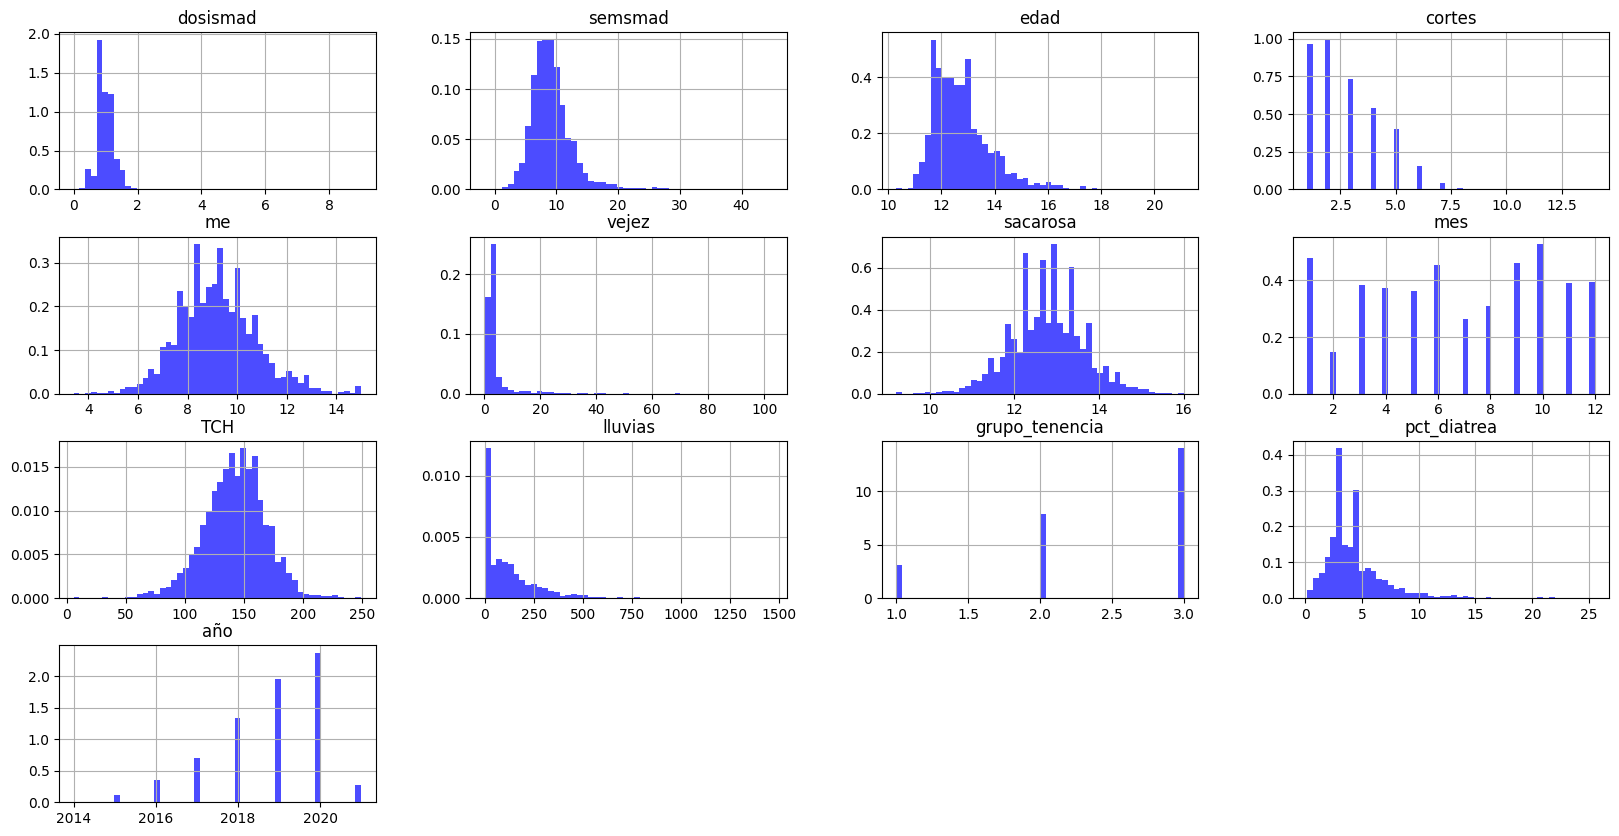

In [6]:
#diagramamos la distribucion de las variables mediante histogramas, configurando el tamaño de los graficos incluimos la curva de densidad y la cantidad de bins
df.hist(figsize=(20,10), bins=50, density=True, color='blue', alpha=0.7)
plt.show()




In [7]:
#revisamos valores nulos
print(df.isnull().sum())
#revisamos valores duplicados
print("Valores Duplicados: ",df.duplicated().sum())



dosismad          0
semsmad           0
edad              0
cortes            0
me                0
vejez             0
sacarosa          0
mes               0
periodo           0
TCH               0
lluvias           0
grupo_tenencia    0
pct_diatrea       0
año               0
dtype: int64
Valores Duplicados:  0


### El Data Set parece no necesitar mayor limpieza por lo que seguimos con el siguiente paso


​Para categorizar las variables **TCH (Toneladas de Caña por Hectárea)** y **%Sac.Caña (Porcentaje de Sacarosa en Caña)** en **"Alto", "Medio" y "Bajo"**, puedes seguir distintos enfoques:

### **1. Basado en Cuantiles (Distribución de los Datos)**

Si tienes una base de datos con múltiples registros, puedes dividir los valores en **terciles** o **cuantiles** para distribuirlos equitativamente:

-   **Bajo**: Valores en el primer tercil (percentil 0-33%)
    
-   **Medio**: Valores en el segundo tercil (percentil 34-66%)
    
-   **Alto**: Valores en el tercer tercil (percentil 67-100%)
    

### **2. Basado en Rangos Definidos por Expertos**

Si tienes criterios específicos dentro de la industria azucarera, puedes establecer umbrales fijos:

Ejemplo (valores referenciales, pueden ajustarse según el contexto):

-   **TCH (Toneladas de Caña por Hectárea)**:
    
    -   **Bajo**: Menos de 80 TCH
        
    -   **Medio**: Entre 80 y 120 TCH
        
    -   **Alto**: Más de 120 TCH
        
-   **%Sac.Caña (Porcentaje de Sacarosa en Caña)**:
    
    -   **Bajo**: Menos de 12%
        
    -   **Medio**: Entre 12% y 14%
        
    -   **Alto**: Más de 14%
        


### Aunque existen estudios asociados a el TCH como 

**Estadísticas Regionales:**

-   **Honduras:** La Asociación de Productores de Azúcar de Honduras (APAH) reporta un rendimiento promedio de TCH de 92.58 entre 2013 y 2024, con valores mínimos de 86.38 y máximos de 99.35. ​[Productores de Azúcar Honduras](https://productoresdeazucarhonduras.com/estadisticas/?utm_source=chatgpt.com)
    

**Estudios en Colombia:**

-   **Santander:** Un estudio evaluó diez variedades de caña de azúcar para producción de panela, encontrando que la variedad CC 93-7711 alcanzó rendimientos de hasta 157.5 TCH, superando el promedio nacional de 139 TCH reportado por Ramírez Durán et al. (2014). ​[Engormix+2ResearchGate+2Redalyc+2](https://www.researchgate.net/publication/306021759_Comportamiento_agroindustrial_de_diez_variedades_de_cana_de_azucar_para_produccion_de_panela_en_Santander_Colombia?utm_source=chatgpt.com)
    
-   **Barbosa:** Otro estudio indicó que las variedades CC 00-3257 y CC 11-600 lograron producciones de 144.15 y 146.38 TCH respectivamente, superiores al promedio regional de 100 TCH en la Hoya del río Suárez. ​[Redalyc](https://www.redalyc.org/journal/5600/560070818002/html/?utm_source=chatgpt.com)
    

**Es importante destacar que estos umbrales pueden variar según factores como la región, variedad de caña, prácticas agrícolas y condiciones climáticas. Por lo tanto, Decidimos usar la opcion de quantiles a no contar con un experto en el tema para definir dichos umbrales**


**Nota:** La clasificación del porcentaje de sacarosa en caña (%Sac.Caña) no se abordó en los estudios mencionados. Para establecer categorías de **"Bajo"**, **"Medio"** y **"Alto"** en esta variable, sería necesario consultar investigaciones adicionales o estadísticas específicas del sector.

In [8]:
#categorizamos las variables objetivos TCH y sacarosa en alto, medio y bajo usando umbrales de quantiles
df['TCH'] = pd.qcut(df['TCH'], q=3, labels=['bajo','medio','alto'])
df['sacarosa'] = pd.qcut(df['sacarosa'], q=3, labels=['bajo','medio','alto'])
#mostramos la cantidad de valores por categoria
print(df['TCH'].value_counts())
print(df['sacarosa'].value_counts())


TCH
bajo     754
alto     728
medio    705
Name: count, dtype: int64
sacarosa
bajo     761
alto     716
medio    710
Name: count, dtype: int64


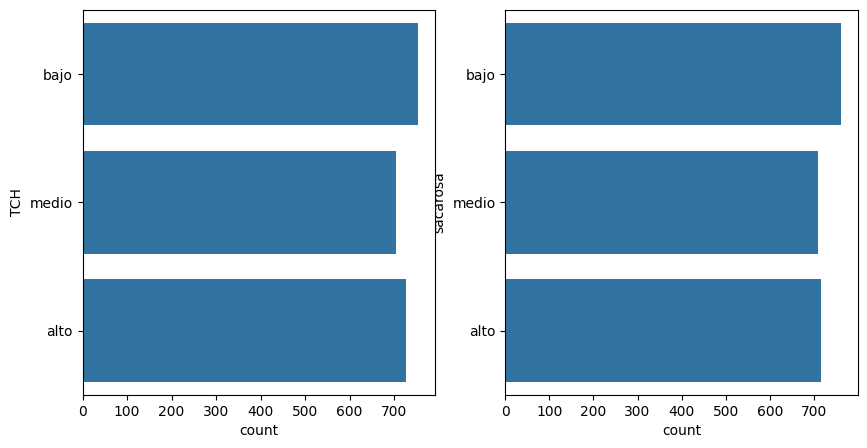

In [9]:
#Graficamos con histogramas las variables categoricas generadas
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.countplot(df['TCH'], ax=ax[0])
sns.countplot(df['sacarosa'], ax=ax[1])
plt.show()

In [10]:
# Mapeamos las variables objetivo a valores numéricos 0, 1, 2
df['TCH'] = df['TCH'].cat.codes
df['sacarosa'] = df['sacarosa'].cat.codes

# Mostramos las primeras filas para verificar
print(df[['TCH', 'sacarosa']].head())


   TCH  sacarosa
0    0         2
1    2         1
2    2         2
3    2         2
4    1         2


In [11]:
#serparacion de variables independientes y dependientes para TCH 
X_tch = df.drop(['TCH','sacarosa'], axis=1)
y_tch = df['TCH']
#separamos los datos en entrenamiento y prueba para X_tch y y_tch
X_train_tch, X_test_tch, y_train_tch, y_test_tch = train_test_split(X_tch, y_tch, test_size=0.3, random_state=42)

#ahora hacemos lo mismo para la variable sacarosa
X_sac = df.drop(['TCH','sacarosa'], axis=1)
y_sac = df['sacarosa']
#separamos los datos en entrenamiento y prueba para X_sac y y_sac
X_train_sac, X_test_sac, y_train_sac, y_test_sac = train_test_split(X_sac, y_sac, test_size=0.3, random_state=42)




In [12]:
#estandardizamos los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_tch = scaler.fit_transform(X_train_tch)
X_test_tch = scaler.transform(X_test_tch)
X_train_sac = scaler.fit_transform(X_train_sac)
X_test_sac = scaler.transform(X_test_sac)


In [13]:
#clasificamos los datos de y en 3 categorias 0,1,2
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_tch = le.fit_transform(y_train_tch)
y_test_tch = le.transform(y_test_tch)
y_train_sac = le.fit_transform(y_train_sac)
y_test_sac = le.transform(y_test_sac)



In [14]:
# Entrenamos modelos One-vs-All y Softmax
#Modelo para TCH
model_tch = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=500)).fit(X_train_tch, y_train_tch)
#Modelo para sacarosa
model_sac = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=500)).fit(X_train_sac, y_train_sac)



In [15]:
# Métricas para el modelo TCH
y_pred_tch = model_tch.predict(X_test_tch)
print("Métricas para el modelo TCH:")
print(classification_report(y_test_tch, y_pred_tch))
print("Matriz de confusión para TCH:")
print(confusion_matrix(y_test_tch, y_pred_tch))

# Métricas para el modelo sacarosa
y_pred_sac = model_sac.predict(X_test_sac)
print("\nMétricas para el modelo sacarosa:")
print(classification_report(y_test_sac, y_pred_sac))
print("Matriz de confusión para sacarosa:")
print(confusion_matrix(y_test_sac, y_pred_sac))




Métricas para el modelo TCH:
              precision    recall  f1-score   support

           0       0.45      0.55      0.49       222
           1       0.37      0.26      0.30       192
           2       0.58      0.60      0.59       243

    accuracy                           0.48       657
   macro avg       0.46      0.47      0.46       657
weighted avg       0.47      0.48      0.47       657

Matriz de confusión para TCH:
[[121  54  47]
 [ 84  49  59]
 [ 66  31 146]]

Métricas para el modelo sacarosa:
              precision    recall  f1-score   support

           0       0.51      0.56      0.53       232
           1       0.32      0.23      0.26       204
           2       0.46      0.53      0.49       221

    accuracy                           0.45       657
   macro avg       0.43      0.44      0.43       657
weighted avg       0.43      0.45      0.44       657

Matriz de confusión para sacarosa:
[[129  51  52]
 [ 71  46  87]
 [ 55  48 118]]


In [30]:
# Entrenamos el modelo Softmax para TCH
model_softmax_tch = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
model_softmax_tch.fit(X_train_tch, y_train_tch)

# Predicciones para TCH
y_pred_softmax_tch = model_softmax_tch.predict(X_test_tch)
print("Métricas para el modelo Softmax (TCH):")
print(classification_report(y_test_tch, y_pred_softmax_tch))
print("Matriz de confusión para TCH (Softmax):")
print(confusion_matrix(y_test_tch, y_pred_softmax_tch))

# Entrenamos el modelo Softmax para sacarosa
model_softmax_sac = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
model_softmax_sac.fit(X_train_sac, y_train_sac)

# Predicciones para sacarosa
y_pred_softmax_sac = model_softmax_sac.predict(X_test_sac)
print("\nMétricas para el modelo Softmax (sacarosa):")
print(classification_report(y_test_sac, y_pred_softmax_sac))
print("Matriz de confusión para sacarosa (Softmax):")
print(confusion_matrix(y_test_sac, y_pred_softmax_sac))

Métricas para el modelo Softmax (TCH):
              precision    recall  f1-score   support

           0       0.45      0.53      0.49       222
           1       0.35      0.28      0.31       192
           2       0.59      0.58      0.59       243

    accuracy                           0.48       657
   macro avg       0.46      0.46      0.46       657
weighted avg       0.47      0.48      0.47       657

Matriz de confusión para TCH (Softmax):
[[118  62  42]
 [ 82  53  57]
 [ 64  37 142]]

Métricas para el modelo Softmax (sacarosa):
              precision    recall  f1-score   support

           0       0.51      0.52      0.52       232
           1       0.30      0.26      0.28       204
           2       0.45      0.50      0.48       221

    accuracy                           0.43       657
   macro avg       0.42      0.43      0.42       657
weighted avg       0.43      0.43      0.43       657

Matriz de confusión para sacarosa (Softmax):
[[121  62  49]
 [ 65  5

c:\Users\rchic\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\rchic\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [17]:
from sklearn.model_selection import GridSearchCV


# Definimos el espacio de búsqueda de hiperparámetros
param_grid = {
    'estimator__C': [0.01, 0.1, 1, 10, 100],
    'estimator__penalty': ['l1', 'l2'],
    'estimator__solver': ['liblinear']
}

# Optimizamos el modelo para TCH
grid_tch = GridSearchCV(
    estimator=OneVsRestClassifier(LogisticRegression(max_iter=500)),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5
)
grid_tch.fit(X_train_tch, y_train_tch)
print("Mejores hiperparámetros para TCH:", grid_tch.best_params_)
print("Mejor puntuación para TCH:", grid_tch.best_score_)

# Optimizamos el modelo para sacarosa
grid_sac = GridSearchCV(
    estimator=OneVsRestClassifier(LogisticRegression(max_iter=500)),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5
)
grid_sac.fit(X_train_sac, y_train_sac)
print("Mejores hiperparámetros para sacarosa:", grid_sac.best_params_)
print("Mejor puntuación para sacarosa:", grid_sac.best_score_)

Mejores hiperparámetros para TCH: {'estimator__C': 0.01, 'estimator__penalty': 'l2', 'estimator__solver': 'liblinear'}
Mejor puntuación para TCH: 0.45882352941176474
Mejores hiperparámetros para sacarosa: {'estimator__C': 10, 'estimator__penalty': 'l2', 'estimator__solver': 'liblinear'}
Mejor puntuación para sacarosa: 0.4745098039215686


In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Definimos los posibles umbrales
umbrales = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Función para ajustar los umbrales y evaluar el desempeño
def evaluar_umbral(y_true, y_prob, umbrales):
    mejor_umbral = None
    mejor_f1 = 0
    resultados = []

    for umbral in umbrales:
        # Convertimos las probabilidades en predicciones binarias
        y_pred = (y_prob >= umbral).astype(int)
        
        # Calculamos las métricas
        precision = precision_score(y_true, y_pred, average='weighted')
        recall = recall_score(y_true, y_pred, average='weighted')
        f1 = f1_score(y_true, y_pred, average='weighted')
        accuracy = accuracy_score(y_true, y_pred)
        
        # Guardamos los resultados
        resultados.append((umbral, precision, recall, f1, accuracy))
        
        # Actualizamos el mejor umbral basado en F1-score
        if f1 > mejor_f1:
            mejor_f1 = f1
            mejor_umbral = umbral

    return mejor_umbral, resultados

# Evaluamos los umbrales para TCH
y_prob_tch = model_tch.predict_proba(X_test_tch)
mejor_umbral_tch, resultados_tch = evaluar_umbral(y_test_tch, y_prob_tch.max(axis=1), umbrales)

# Evaluamos los umbrales para sacarosa
y_prob_sac = model_sac.predict_proba(X_test_sac)
mejor_umbral_sac, resultados_sac = evaluar_umbral(y_test_sac, y_prob_sac.max(axis=1), umbrales)

# Mostramos los mejores umbrales
print("Mejor umbral para TCH:", mejor_umbral_tch)
print("Mejor umbral para sacarosa:", mejor_umbral_sac)

# Mostramos los resultados detallados
print("\nResultados para TCH:")
for res in resultados_tch:
    print(f"Umbral: {res[0]:.2f}, Precisión: {res[1]:.4f}, Recall: {res[2]:.4f}, F1-Score: {res[3]:.4f}, Accuracy: {res[4]:.4f}")

print("\nResultados para sacarosa:")
for res in resultados_sac:
    print(f"Umbral: {res[0]:.2f}, Precisión: {res[1]:.4f}, Recall: {res[2]:.4f}, F1-Score: {res[3]:.4f}, Accuracy: {res[4]:.4f}")

Mejor umbral para TCH: 0.5
Mejor umbral para sacarosa: 0.5

Resultados para TCH:
Umbral: 0.10, Precisión: 0.0854, Recall: 0.2922, F1-Score: 0.1322, Accuracy: 0.2922
Umbral: 0.20, Precisión: 0.0854, Recall: 0.2922, F1-Score: 0.1322, Accuracy: 0.2922
Umbral: 0.30, Precisión: 0.0854, Recall: 0.2922, F1-Score: 0.1322, Accuracy: 0.2922
Umbral: 0.40, Precisión: 0.2053, Recall: 0.3014, F1-Score: 0.2290, Accuracy: 0.3014
Umbral: 0.50, Precisión: 0.2138, Recall: 0.3531, F1-Score: 0.2569, Accuracy: 0.3531
Umbral: 0.60, Precisión: 0.1321, Recall: 0.3181, F1-Score: 0.1697, Accuracy: 0.3181
Umbral: 0.70, Precisión: 0.1138, Recall: 0.3364, F1-Score: 0.1701, Accuracy: 0.3364
Umbral: 0.80, Precisión: 0.1142, Recall: 0.3379, F1-Score: 0.1707, Accuracy: 0.3379
Umbral: 0.90, Precisión: 0.1142, Recall: 0.3379, F1-Score: 0.1707, Accuracy: 0.3379

Resultados para sacarosa:
Umbral: 0.10, Precisión: 0.0964, Recall: 0.3105, F1-Score: 0.1471, Accuracy: 0.3105
Umbral: 0.20, Precisión: 0.0964, Recall: 0.3105, F1-

c:\Users\rchic\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rchic\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rchic\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Definimos el rango de valores para n_neighbors
param_grid_knn = {'n_neighbors': range(1, 21)}

# Configuramos el modelo KNN para TCH
knn_tch = KNeighborsClassifier()
grid_knn_tch = GridSearchCV(knn_tch, param_grid_knn, cv=5, scoring='accuracy')
grid_knn_tch.fit(X_train_tch, y_train_tch)

# Configuramos el modelo KNN para sacarosa
knn_sac = KNeighborsClassifier()
grid_knn_sac = GridSearchCV(knn_sac, param_grid_knn, cv=5, scoring='accuracy')
grid_knn_sac.fit(X_train_sac, y_train_sac)

# Mostramos los mejores resultados
print("Mejor número de vecinos para TCH:", grid_knn_tch.best_params_['n_neighbors'])
print("Mejor puntuación para TCH:", grid_knn_tch.best_score_)

print("\nMejor número de vecinos para sacarosa:", grid_knn_sac.best_params_['n_neighbors'])
print("Mejor puntuación para sacarosa:", grid_knn_sac.best_score_)
# Aplicamos un modelo KNN con K=10 para TCH
knn_tch_k10 = KNeighborsClassifier(n_neighbors=10)
knn_tch_k10.fit(X_train_tch, y_train_tch)
y_pred_tch_knn = knn_tch_k10.predict(X_test_tch)

# Aplicamos un modelo KNN con K=10 para sacarosa
knn_sac_k10 = KNeighborsClassifier(n_neighbors=10)
knn_sac_k10.fit(X_train_sac, y_train_sac)
y_pred_sac_knn = knn_sac_k10.predict(X_test_sac)

# Mostramos las métricas para TCH
print("Métricas para el modelo KNN (K=10) - TCH:")
print(classification_report(y_test_tch, y_pred_tch_knn))
print("Matriz de confusión para TCH (K=10):")
print(confusion_matrix(y_test_tch, y_pred_tch_knn))

# Mostramos las métricas para sacarosa
print("\nMétricas para el modelo KNN (K=10) - Sacarosa:")
print(classification_report(y_test_sac, y_pred_sac_knn))
print("Matriz de confusión para sacarosa (K=10):")
print(confusion_matrix(y_test_sac, y_pred_sac_knn))


Mejor número de vecinos para TCH: 10
Mejor puntuación para TCH: 0.46078431372549017

Mejor número de vecinos para sacarosa: 10
Mejor puntuación para sacarosa: 0.5124183006535947
Métricas para el modelo KNN (K=10) - TCH:
              precision    recall  f1-score   support

           0       0.50      0.52      0.51       222
           1       0.35      0.38      0.36       192
           2       0.57      0.52      0.55       243

    accuracy                           0.48       657
   macro avg       0.47      0.47      0.47       657
weighted avg       0.48      0.48      0.48       657

Matriz de confusión para TCH (K=10):
[[115  65  42]
 [ 67  72  53]
 [ 48  68 127]]

Métricas para el modelo KNN (K=10) - Sacarosa:
              precision    recall  f1-score   support

           0       0.55      0.60      0.57       232
           1       0.36      0.33      0.34       204
           2       0.51      0.50      0.51       221

    accuracy                           0.48       

In [20]:
# Entrenamos un modelo de regresión logística con regularización L1 para TCH
model_tch_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=500)
model_tch_l1.fit(X_train_tch, y_train_tch)

# Obtenemos los coeficientes del modelo para TCH
coef_tch = model_tch_l1.coef_
print("Coeficientes del modelo TCH con regularización L1:")
print(coef_tch)

# Entrenamos un modelo de regresión logística con regularización L1 para sacarosa
model_sac_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=500)
model_sac_l1.fit(X_train_sac, y_train_sac)

# Obtenemos los coeficientes del modelo para sacarosa
coef_sac = model_sac_l1.coef_
print("\nCoeficientes del modelo sacarosa con regularización L1:")
print(coef_sac)

# Identificamos las variables más importantes (coeficientes no cero)
important_features_tch = np.where(coef_tch != 0)[1]
important_features_sac = np.where(coef_sac != 0)[1]

print("\nVariables importantes para TCH:", important_features_tch)
print("Variables importantes para sacarosa:", important_features_sac)

Coeficientes del modelo TCH con regularización L1:
[[ 9.96146982e-03  1.20101937e-01 -4.02859126e-02  2.41505037e-01
  -3.91159327e-02  1.35984031e-01 -5.44522176e-02  0.00000000e+00
  -3.74107412e-02 -2.16368714e-01 -1.75455352e-01  3.37975449e-01]
 [-4.79863789e-02 -4.37478215e-05 -2.02196825e-01  8.47019578e-02
  -8.64134302e-02 -9.18149000e-02  6.29422940e-02  0.00000000e+00
   0.00000000e+00 -3.29166107e-02  9.44093849e-02 -2.46636023e-02]
 [ 6.26921592e-02 -9.44649570e-02  2.04714146e-01 -4.40493880e-01
   1.49069760e-01 -7.55982542e-02  3.81227688e-03 -1.78835995e-01
   4.68635744e-02  3.13986777e-01  3.00821295e-02 -9.61524037e-02]]

Coeficientes del modelo sacarosa con regularización L1:
[[-0.01753632 -0.38986266  0.21976809  0.13386971  0.52634859  0.0699967
  -0.13863751 -0.25108218  0.36521916  0.22427745  0.18721804  0.        ]
 [-0.00745218 -0.11925014 -0.08957623 -0.09033909 -0.02561436 -0.1168053
  -0.09579975  0.          0.         -0.04476091 -0.08006112  0.09830691

In [21]:
# Identificamos las variables no representativas (coeficientes iguales a 0)
non_representative_features_tch = np.where(coef_tch == 0)[1]
non_representative_features_sac = np.where(coef_sac == 0)[1]

# Creamos copias de los conjuntos de entrenamiento y prueba
X_train_tch_reduced = np.delete(X_train_tch, non_representative_features_tch, axis=1)
X_test_tch_reduced = np.delete(X_test_tch, non_representative_features_tch, axis=1)

X_train_sac_reduced = np.delete(X_train_sac, non_representative_features_sac, axis=1)
X_test_sac_reduced = np.delete(X_test_sac, non_representative_features_sac, axis=1)

# Entrenamos nuevamente los modelos con las variables reducidas
model_tch_reduced = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=500)).fit(X_train_tch_reduced, y_train_tch)
model_sac_reduced = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=500)).fit(X_train_sac_reduced, y_train_sac)

# Métricas para el modelo TCH reducido
y_pred_tch_reduced = model_tch_reduced.predict(X_test_tch_reduced)
print("Métricas para el modelo TCH reducido:")
print(classification_report(y_test_tch, y_pred_tch_reduced))
print("Matriz de confusión para TCH reducido:")
print(confusion_matrix(y_test_tch, y_pred_tch_reduced))

# Métricas para el modelo sacarosa reducido
y_pred_sac_reduced = model_sac_reduced.predict(X_test_sac_reduced)
print("\nMétricas para el modelo sacarosa reducido:")
print(classification_report(y_test_sac, y_pred_sac_reduced))
print("Matriz de confusión para sacarosa reducido:")
print(confusion_matrix(y_test_sac, y_pred_sac_reduced))


Métricas para el modelo TCH reducido:
              precision    recall  f1-score   support

           0       0.44      0.55      0.49       222
           1       0.36      0.24      0.29       192
           2       0.58      0.60      0.59       243

    accuracy                           0.48       657
   macro avg       0.46      0.46      0.46       657
weighted avg       0.47      0.48      0.47       657

Matriz de confusión para TCH reducido:
[[121  54  47]
 [ 87  47  58]
 [ 68  30 145]]

Métricas para el modelo sacarosa reducido:
              precision    recall  f1-score   support

           0       0.50      0.52      0.51       232
           1       0.32      0.23      0.27       204
           2       0.43      0.53      0.48       221

    accuracy                           0.43       657
   macro avg       0.42      0.43      0.42       657
weighted avg       0.42      0.43      0.42       657

Matriz de confusión para sacarosa reducido:
[[120  50  62]
 [ 66  47  9

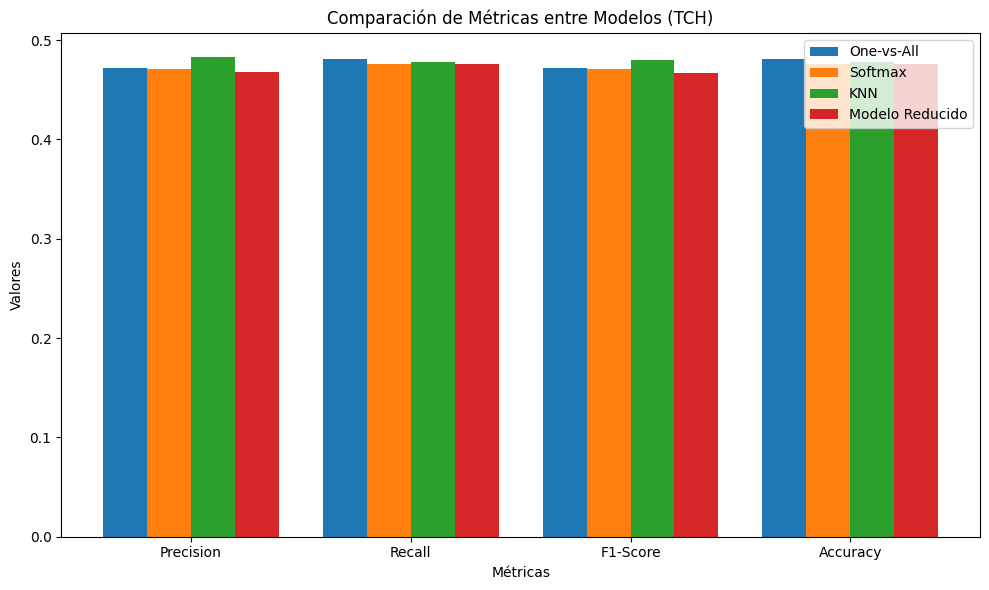

In [23]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

import matplotlib.pyplot as plt

# Definimos una función para calcular las métricas
def calcular_metricas(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    accuracy = accuracy_score(y_true, y_pred)
    return precision, recall, f1, accuracy

# Calculamos las métricas para cada modelo
metricas_onevsall = calcular_metricas(y_test_tch, y_pred_tch)
metricas_softmax = calcular_metricas(y_test_tch, y_pred_softmax_tch)
metricas_knn = calcular_metricas(y_test_tch, y_pred_tch_knn)
metricas_reducido = calcular_metricas(y_test_tch, y_pred_tch_reduced)

# Creamos un gráfico para comparar las métricas
labels = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
x = np.arange(len(labels))  # Posiciones para las barras

# Métricas de los modelos
metricas = [metricas_onevsall, metricas_softmax, metricas_knn, metricas_reducido]
modelos = ['One-vs-All', 'Softmax', 'KNN', 'Modelo Reducido']

# Configuramos el gráfico
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.2  # Ancho de las barras

# Dibujamos las barras para cada modelo
for i, (metrica, modelo) in enumerate(zip(metricas, modelos)):
    ax.bar(x + i * width, metrica, width, label=modelo)

# Configuramos las etiquetas y el diseño
ax.set_xlabel('Métricas')
ax.set_ylabel('Valores')
ax.set_title('Comparación de Métricas entre Modelos (TCH)')
ax.set_xticks(x + width * (len(modelos) - 1) / 2)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

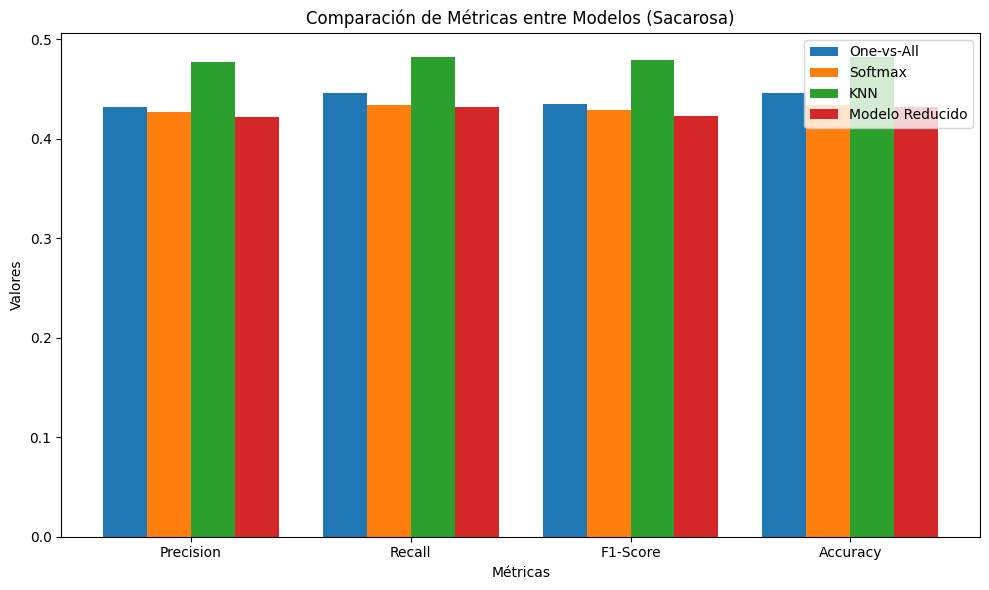

In [24]:
# Calculamos las métricas para cada modelo de sacarosa
metricas_onevsall_sac = calcular_metricas(y_test_sac, y_pred_sac)
metricas_softmax_sac = calcular_metricas(y_test_sac, y_pred_softmax_sac)
metricas_knn_sac = calcular_metricas(y_test_sac, y_pred_sac_knn)
metricas_reducido_sac = calcular_metricas(y_test_sac, y_pred_sac_reduced)

# Creamos un gráfico para comparar las métricas
labels_sac = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
x_sac = np.arange(len(labels_sac))  # Posiciones para las barras

# Métricas de los modelos
metricas_sac = [metricas_onevsall_sac, metricas_softmax_sac, metricas_knn_sac, metricas_reducido_sac]
modelos_sac = ['One-vs-All', 'Softmax', 'KNN', 'Modelo Reducido']

# Configuramos el gráfico
fig, ax = plt.subplots(figsize=(10, 6))
width_sac = 0.2  # Ancho de las barras

# Dibujamos las barras para cada modelo
for i, (metrica, modelo) in enumerate(zip(metricas_sac, modelos_sac)):
    ax.bar(x_sac + i * width_sac, metrica, width_sac, label=modelo)

# Configuramos las etiquetas y el diseño
ax.set_xlabel('Métricas')
ax.set_ylabel('Valores')
ax.set_title('Comparación de Métricas entre Modelos (Sacarosa)')
ax.set_xticks(x_sac + width_sac * (len(modelos_sac) - 1) / 2)
ax.set_xticklabels(labels_sac)
ax.legend()

plt.tight_layout()
plt.show()

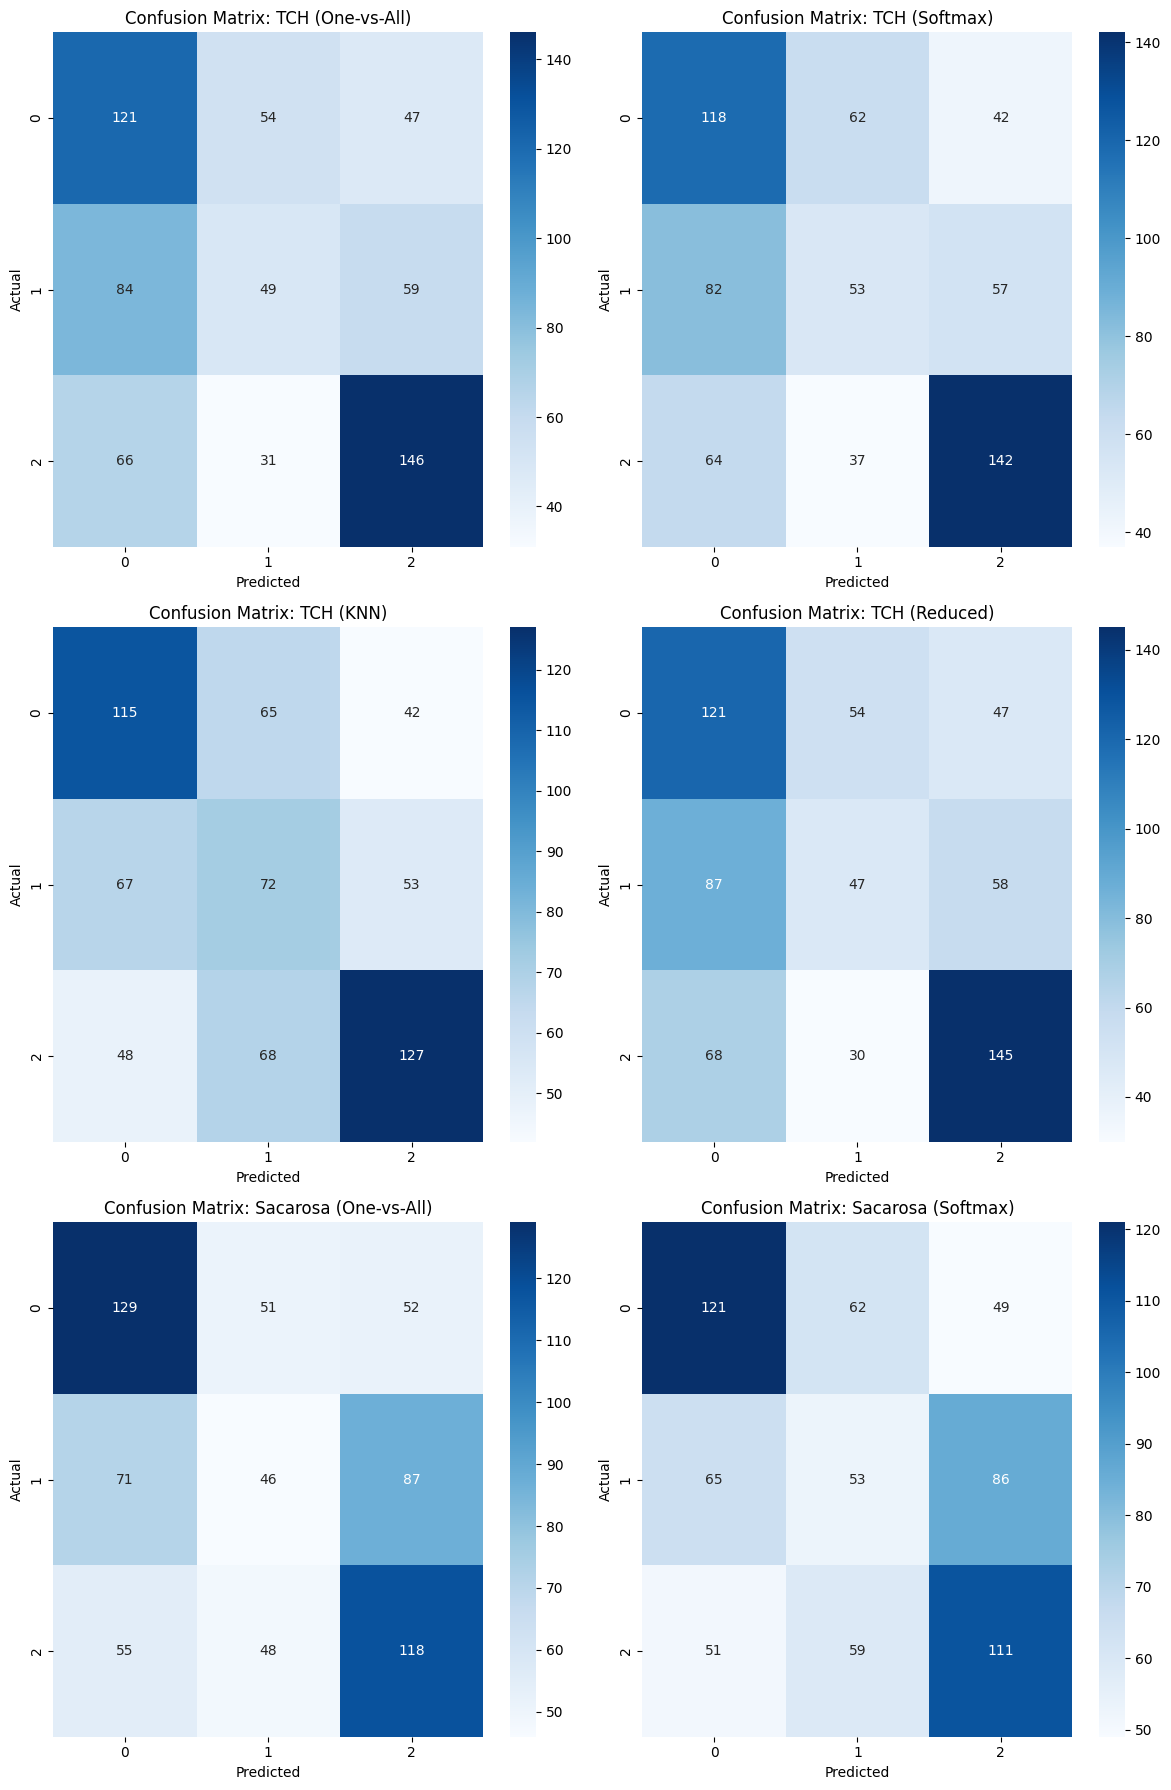

In [31]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

# Función para graficar una matriz de confusión
def plot_confusion_matrix(y_true, y_pred, title, ax):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Configuramos el tamaño de la figura
fig, axes = plt.subplots(3, 2, figsize=(12, 18))

# Graficamos las matrices de confusión
plot_confusion_matrix(y_test_tch, y_pred_tch, "Confusion Matrix: TCH (One-vs-All)", axes[0, 0])
plot_confusion_matrix(y_test_tch, y_pred_softmax_tch, "Confusion Matrix: TCH (Softmax)", axes[0, 1])
plot_confusion_matrix(y_test_tch, y_pred_tch_knn, "Confusion Matrix: TCH (KNN)", axes[1, 0])
plot_confusion_matrix(y_test_tch, y_pred_tch_reduced, "Confusion Matrix: TCH (Reduced)", axes[1, 1])
plot_confusion_matrix(y_test_sac, y_pred_sac, "Confusion Matrix: Sacarosa (One-vs-All)", axes[2, 0])
plot_confusion_matrix(y_test_sac, y_pred_softmax_sac, "Confusion Matrix: Sacarosa (Softmax)", axes[2, 1])

# Ajustamos el diseño
plt.tight_layout()
plt.show()

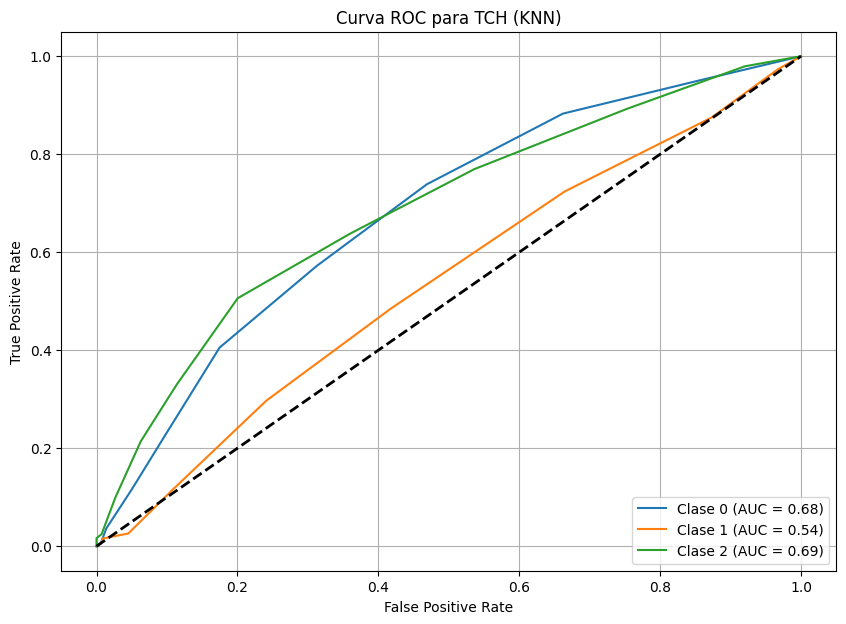

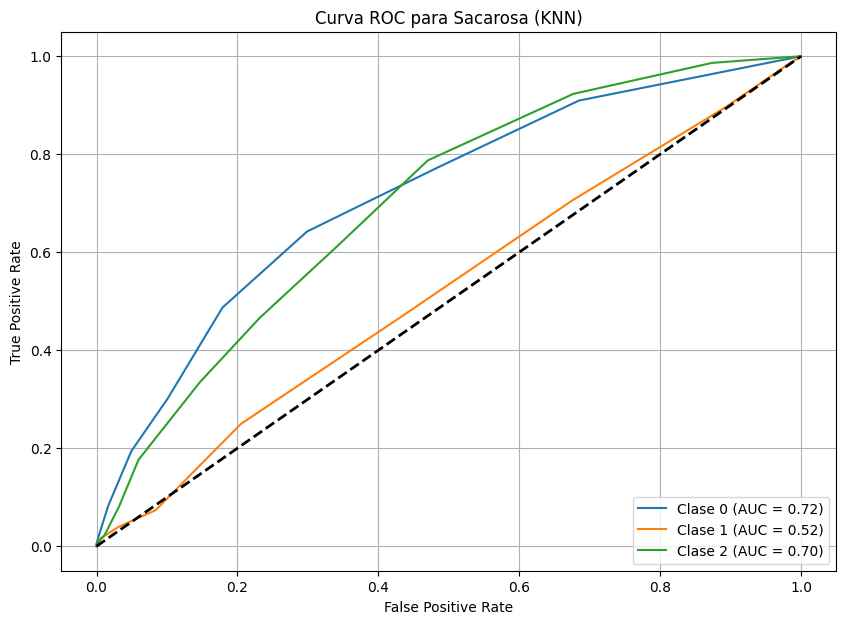

In [26]:
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt

# Función para graficar la curva ROC
def plot_roc_curve(y_true, y_prob, title):
    plt.figure(figsize=(10, 7))
    for i in range(3):  # Para cada clase
        fpr, tpr, _ = roc_curve(y_true[:, i], y_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Clase {i} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Línea diagonal
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Calculamos y graficamos la curva ROC para TCH (KNN)
plot_roc_curve(y_test_tch_bin, y_prob_tch_knn, 'Curva ROC para TCH (KNN)')

# Calculamos y graficamos la curva ROC para sacarosa (KNN)
plot_roc_curve(y_test_sac_bin, y_prob_sac_knn, 'Curva ROC para Sacarosa (KNN)')

In [29]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Configuramos StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Modelo KNN
knn = KNeighborsClassifier(n_neighbors=10)

# Validación cruzada para TCH
scores_tch = cross_val_score(knn, X_train_tch, y_train_tch, cv=skf, scoring='accuracy')
print("Resultados de validación cruzada para TCH:")
print("Accuracy por fold:", scores_tch)
print("Accuracy promedio:", scores_tch.mean())

# Validación cruzada para sacarosa
scores_sac = cross_val_score(knn, X_train_sac, y_train_sac, cv=skf, scoring='accuracy')
print("\nResultados de validación cruzada para sacarosa:")
print("Accuracy por fold:", scores_sac)
print("Accuracy promedio:", scores_sac.mean())

Resultados de validación cruzada para TCH:
Accuracy por fold: [0.45098039 0.47058824 0.45751634 0.44117647 0.44117647]
Accuracy promedio: 0.4522875816993464

Resultados de validación cruzada para sacarosa:
Accuracy por fold: [0.53921569 0.47058824 0.51960784 0.49019608 0.47058824]
Accuracy promedio: 0.4980392156862745
